In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [23]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [24]:
np.random.seed(42)

print(dataset.data.shape) # 506 Zeilen mit 13 Spalten (Features)
x = dataset.data[:, 5:6] # 5. Spalte (Feature)
print(x.shape)
y = dataset.target

# Split:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # Test 30%; Train 70%
print(x_train.shape)
print(x_test.shape)

(506, 13)
(506, 1)
(354, 1)
(152, 1)


In [25]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coef: [9.1181022]
Intercept: -34.662307438406785
R2-Score: 0.4584649934303068


### Visualization

In [26]:
def plot_regressor(regr, x_test, y_test):
    x1 = np.min(x) - 1
    x2 = np.max(x) + 1    
    x_points = np.array([x1, x2])
    x_points = np.reshape(x_points, (-1, 1))
    y_pred = regr.predict(x_points)
    y1, y2 = y_pred
    plt.plot((x1, x2), (y1, y2), color="black")
    # print(np.column_stack((x_test, y_test)))
    plt.scatter(x_test, y_test, color="red")
    plt.show()

### Testdaten

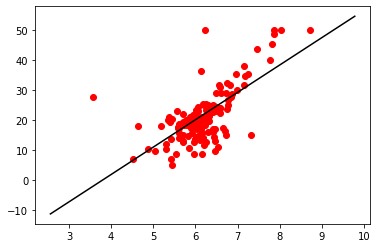

In [27]:
plot_regressor(regr, x_test, y_test)

In [28]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)
    
    min_val = min(np.min(y_pred_train), np.min(y_pred_test)) # Was ist der minimale Wert von train und test
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))
    
    print(np.min(y_pred_train))
    print(np.min(y_pred_test))
    print(min_val)
    
    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

0.5609213497777432
-2.1927455138080063
-2.1927455138080063


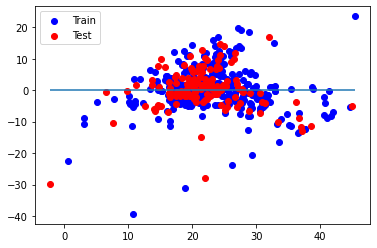

In [29]:
plot_residuals(regr, x_train, y_train, x_test, y_test)